In [7]:
#RETURN MIN DISTANCE CENTROID INDEX
import math
def distance(point,centroids):
    result = [None]*len(centroids)
    for i in range(len(result)):
        result[i]= math.sqrt(pow(point[0]-centroids[i][0],2)+pow(point[1]-centroids[i][1],2))
    return result.index(min(result))

In [8]:
def NewCentroids(centroid,data,result):
    sumX = 0
    sumY = 0
    num = 0
    for i in range(len(data)):
        if centroid == result[i]:
            sumX += data[i][0]
            sumY += data[i][1]
            num += 1
            
    if num == 0 :
        num = 1
        
    pointX = sumX/num
    pointY = sumY/num
    
    return [pointX,pointY]


In [9]:
def MSE(data,result,centroids):
    sum = 0 
    num = 0
    for i in range(len(data)):
        sum += math.sqrt(pow(data[i][0]-centroids[result[i]][0],2)+pow(data[i][1]-centroids[result[i]][1],2))
        num += 1
    return sum/num

In [10]:
import random
import numpy as np
import pandas as pd
def Kmeans(data,k,plot = False):
    centroids = []
    #randomly create centroids
    for i in range(k):
        centroids.append([random.uniform(min(data[:,0]),max(data[:,0])),random.uniform(min(data[:,1]),max(data[:,1]))])
    
    result = [None]*len(data)
    tempCentroids = list(centroids)
    counter = 0
    while True:
        counter += 1
        #Assign data to closest centroid
        for i in range(len(data)):
            result[i] = distance(data[i],centroids)
        #calculate new centroids
        for i in range(len(centroids)):
            centroids[i] = NewCentroids(i,data,result)
        #Termenate condition
        if tempCentroids == centroids:
            break
        else:
            tempCentroids = list(centroids)
    #Show clusters
    if plot == True:
        data = np.array(data)
        result = np.array(result)
        for i in range(len(centroids)):
            plt.scatter(data[result==i][:,0],data[result==i][:,1])
        plt.title('{} Iteration, {} Clusters'.format(counter,k))
        plt.show()
    
    
    
    return MSE(data,result,centroids)
    

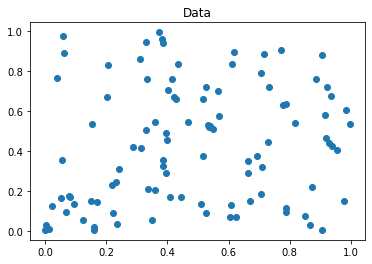

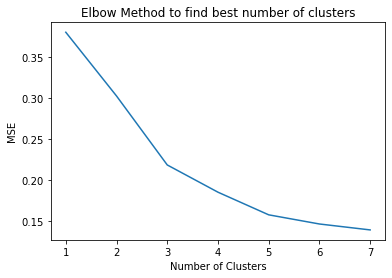

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#Generate data
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

X  = np.array([[random.random(), random.random()] for i in range(100)])


plt.scatter(X[:, 0], X[:, 1]);
plt.title('Data')
plt.show();

#Elbow
mse=[]
for i in range(1,8):
    tempMSE = Kmeans(X,i)
    mse.append(tempMSE)
plt.plot(range(1,8),mse)
plt.title('Elbow Method to find best number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('MSE')
plt.show()

print()

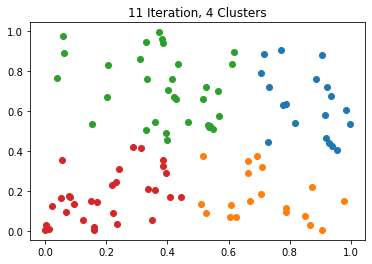

0.18081740240807728

In [19]:
Kmeans(X,4,plot = True)